## Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## import data

In [2]:
df_SNP = pd.read_csv ("matrix_1kg.txt",sep='\t')
df_SNP

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# add a column for allele frequency
allele_freq=df_SNP.iloc[:,4:].sum(axis=1)/len(df_SNP.iloc[1,4:])
allele_freq

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

In [4]:
#extract SNP with allele frequency between 0.05 and 0.95
roi_df=df_SNP[(allele_freq <=0.95)& (allele_freq>=0.05)]
roi_df
# Be careful to use the () before and after&

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
37,chr21,28821553,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,chr21,18393571,A,G,0,1,0,0,0,1,...,0,0,0,1,1,2,0,1,1,1
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9980,chr21,30950713,A,C,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## PCA based on common variation

In [5]:
pca_input=roi_df.iloc[:,4:]
pca_input



# pca_input_standardized = StandardScaler().fit_transform(pca_input)


,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,1,2,0,1,1,1
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
#transpose the database
pca_input = pca_input.T
pca_input

,20,37,38,41,46,54,57,66,77,93,...,9888,9894,9904,9908,9913,9927,9959,9974,9980,9998
HG00096,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
HG00097,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
HG00099,1,0,2,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
HG00100,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
HG00101,0,0,1,0,0,2,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
NA21141,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
NA21142,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
NA21143,0,0,0,0,0,2,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0


In [7]:
#do the standard scaling
pca_input_standardized = StandardScaler().fit_transform(pca_input)
#check the mean
pca_input_standardized.mean(axis = 0)

array([-1.56424673e-16, -1.01172777e-15,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  2.28942105e-15,  5.70536118e-16,
        1.65749152e-16,  2.45835098e-16,  2.91847481e-16, -1.71966924e-15,
        3.19036616e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  5.13979231e-16,  1.90010226e-15,
        3.07794955e-16,  1.41814870e-15,  2.18210240e-16,  1.21828241e-16,
       -2.11726677e-15, -3.32805473e-16, -1.36189682e-15, -3.84264398e-16,
        1.92110413e-16,  2.84091606e-16, -3.47184343e-16,  2.08206032e-15,
       -4.99861795e-16, -1.89713934e-15, -4.65701087e-16, -1.42045803e-16,
       -8.84583702e-16,  2.96379004e-16,  3.13546503e-16, -2.23621923e-15,
       -6.62038016e-16,  2.15839905e-15, -1.99674570e-15, -2.44266494e-16,
       -5.92017278e-16,  1.59069513e-15, -3.25398177e-16, -9.36957646e-16,
       -7.13496940e-16,  3.40866355e-16,  1.24965449e-16,  2.07622163e-17,
        4.61518143e-16, -

In [8]:
# check the variance
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [9]:
# do pca
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.62155502, -9.01305123, -0.13179929, ..., -0.77159423,
         0.36127618,  1.76127891],
       [-6.25245932, -8.48463299,  1.9730256 , ...,  0.84502815,
        -3.86236892, -0.12847454],
       [-6.20196351, -7.49404112,  0.30615676, ..., -1.35360623,
        -0.17907429,  0.89524527],
       ...,
       [-4.66857746, -2.81535363, -2.91268538, ..., -1.33344549,
         2.74337733,  0.41988857],
       [-6.38786618, -2.8833766 , -4.37128232, ...,  1.35755838,
        -0.38169798, -0.56726214],
       [-5.15728886, -0.26905041, -5.85930881, ..., -2.7529536 ,
        -0.39277031, -0.69735   ]])

In [10]:
#check if the data points number is correct
pca_output.shape

(2548, 10)

In [11]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.621555,-9.013051,-0.131799,-4.713220,0.066507,0.505594,-2.309130,-0.771594,0.361276,1.761279
1,-6.252459,-8.484633,1.973026,-3.430608,1.529180,0.016839,-1.165379,0.845028,-3.862369,-0.128475
2,-6.201964,-7.494041,0.306157,-4.850059,0.540657,0.032834,-0.204605,-1.353606,-0.179074,0.895245
3,-5.065617,-5.671574,1.863634,-3.445255,2.294514,-1.297397,0.780250,-1.814432,0.216600,1.085289
4,-6.760246,-8.923753,2.378882,-2.828543,-2.457695,0.907974,-1.461519,0.207789,-1.640013,0.885510
...,...,...,...,...,...,...,...,...,...,...
2543,-6.466132,0.340684,-2.580980,4.261682,-0.385702,-2.462736,-2.053277,0.956979,4.142789,-0.581028
2544,-6.594330,-2.616532,-5.129903,3.105758,1.933377,-0.611294,-1.789462,0.129912,0.518586,-3.186936
2545,-4.668577,-2.815354,-2.912685,3.295603,0.561550,-1.240481,-0.031140,-1.333445,2.743377,0.419889
2546,-6.387866,-2.883377,-4.371282,3.203211,-2.866562,2.445508,-0.853910,1.357558,-0.381698,-0.567262


## load metadata

In [13]:
df_metadata = pd.read_csv("integrated_call_samples_v3.20130502.ALL.panel", sep = "\t")
df_metadata

,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,HG00096,GBR,EUR,male,NaN,NaN
1,HG00097,GBR,EUR,female,NaN,NaN
2,HG00099,GBR,EUR,female,NaN,NaN
3,HG00100,GBR,EUR,female,NaN,NaN
4,HG00101,GBR,EUR,male,NaN,NaN
...,...,...,...,...,...,...
2499,NA21137,GIH,SAS,female,NaN,NaN
2500,NA21141,GIH,SAS,female,NaN,NaN
2501,NA21142,GIH,SAS,female,NaN,NaN
2502,NA21143,GIH,SAS,female,NaN,NaN


In [14]:
pca_output_df['sample'] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-6.621555,-9.013051,-0.131799,-4.713220,0.066507,0.505594,-2.309130,-0.771594,0.361276,1.761279,HG00096
1,-6.252459,-8.484633,1.973026,-3.430608,1.529180,0.016839,-1.165379,0.845028,-3.862369,-0.128475,HG00097
2,-6.201964,-7.494041,0.306157,-4.850059,0.540657,0.032834,-0.204605,-1.353606,-0.179074,0.895245,HG00099
3,-5.065617,-5.671574,1.863634,-3.445255,2.294514,-1.297397,0.780250,-1.814432,0.216600,1.085289,HG00100
4,-6.760246,-8.923753,2.378882,-2.828543,-2.457695,0.907974,-1.461519,0.207789,-1.640013,0.885510,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.466132,0.340684,-2.580980,4.261682,-0.385702,-2.462736,-2.053277,0.956979,4.142789,-0.581028,NA21137
2544,-6.594330,-2.616532,-5.129903,3.105758,1.933377,-0.611294,-1.789462,0.129912,0.518586,-3.186936,NA21141
2545,-4.668577,-2.815354,-2.912685,3.295603,0.561550,-1.240481,-0.031140,-1.333445,2.743377,0.419889,NA21142
2546,-6.387866,-2.883377,-4.371282,3.203211,-2.866562,2.445508,-0.853910,1.357558,-0.381698,-0.567262,NA21143


In [15]:
df_metadata=df_metadata.iloc[:,:-2]
df_metadata

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [16]:
pca_output_df = pd.merge(pca_output_df, df_metadata, on = "sample")
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample,pop,super_pop,gender
0,-6.621555,-9.013051,-0.131799,-4.713220,0.066507,0.505594,-2.309130,-0.771594,0.361276,1.761279,HG00096,GBR,EUR,male
1,-6.252459,-8.484633,1.973026,-3.430608,1.529180,0.016839,-1.165379,0.845028,-3.862369,-0.128475,HG00097,GBR,EUR,female
2,-6.201964,-7.494041,0.306157,-4.850059,0.540657,0.032834,-0.204605,-1.353606,-0.179074,0.895245,HG00099,GBR,EUR,female
3,-5.065617,-5.671574,1.863634,-3.445255,2.294514,-1.297397,0.780250,-1.814432,0.216600,1.085289,HG00100,GBR,EUR,female
4,-6.760246,-8.923753,2.378882,-2.828543,-2.457695,0.907974,-1.461519,0.207789,-1.640013,0.885510,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,-6.466132,0.340684,-2.580980,4.261682,-0.385702,-2.462736,-2.053277,0.956979,4.142789,-0.581028,NA21137,GIH,SAS,female
2499,-6.594330,-2.616532,-5.129903,3.105758,1.933377,-0.611294,-1.789462,0.129912,0.518586,-3.186936,NA21141,GIH,SAS,female
2500,-4.668577,-2.815354,-2.912685,3.295603,0.561550,-1.240481,-0.031140,-1.333445,2.743377,0.419889,NA21142,GIH,SAS,female
2501,-6.387866,-2.883377,-4.371282,3.203211,-2.866562,2.445508,-0.853910,1.357558,-0.381698,-0.567262,NA21143,GIH,SAS,female


### plotting on population

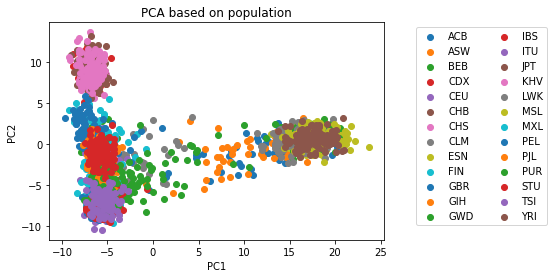

In [32]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("pop")
for name, group in tissues:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.5, 1), loc = 'upper right', ncol = 2)
plt.title('PCA based on population')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### plotting on superpopulation

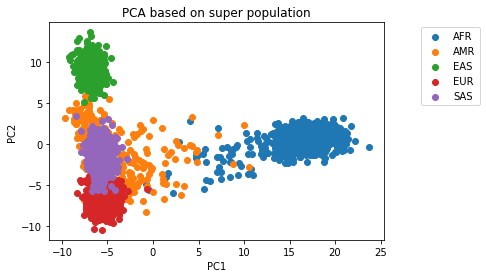

In [31]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("super_pop")
for name, group in tissues:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.3, 1), loc = 'upper right', ncol = 1)
plt.title('PCA based on super population')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### plotting based on sex

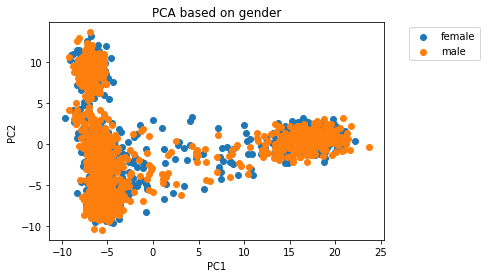

In [33]:
fig, ax = plt.subplots()
tissues = pca_output_df.groupby("gender")
for name, group in tissues:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.3, 1), loc = 'upper right', ncol = 1)
plt.title('PCA based on gender')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()